In [55]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, optimizers, regularizers
from keras.datasets import reuters
from keras.utils import to_categorical #HAcer one hoding coding
from sklearn.model_selection import train_test_split

%config Completer.use_jedi = False


In [3]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

/home/cesar/anaconda3/envs/ia/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/cesar/anaconda3/envs/ia/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for w in train_data[0]:
    print(word_index.get(w -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


### Vectorizar las palabras

In [5]:
def vectorizar(sequences, dim = 10000):
    vector = np.zeros((len(sequences),dim))
    
    for idx , w in enumerate(sequences):
        vector[idx,w] = 1
    return vector

In [6]:
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Crear los valores de validacion

In [8]:
X_train.shape

(8982, 10000)

In [9]:
X_test.shape

(2246, 10000)

In [10]:
X_train , X_validation ,y_train , y_validation = train_test_split(X_train,y_train,test_size=0.2)

# Modelo

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape= (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [47]:
model.compile(
    optimizer= 'rmsprop',
    loss= 'categorical_crossentropy',
    metrics= 'accuracy'
)

In [24]:
X_train.shape

(7185, 10000)

In [25]:
y_train.shape

(7185, 46)

In [48]:
output = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 512,
    validation_data = (X_validation,y_validation)
)

Epoch 1/10
15/15 [==============================] - 1s 69ms/step - loss: 2.7414 - accuracy: 0.4729 - val_loss: 1.8773 - val_accuracy: 0.6533
Epoch 2/10
15/15 [==============================] - 1s 35ms/step - loss: 1.4882 - accuracy: 0.7008 - val_loss: 1.4219 - val_accuracy: 0.6867
Epoch 3/10
15/15 [==============================] - 0s 27ms/step - loss: 1.0960 - accuracy: 0.7608 - val_loss: 1.2834 - val_accuracy: 0.7156
Epoch 4/10
15/15 [==============================] - 0s 32ms/step - loss: 0.8773 - accuracy: 0.8051 - val_loss: 1.1810 - val_accuracy: 0.7379
Epoch 5/10
15/15 [==============================] - 0s 30ms/step - loss: 0.7143 - accuracy: 0.8434 - val_loss: 1.0754 - val_accuracy: 0.7618
Epoch 6/10
15/15 [==============================] - 0s 29ms/step - loss: 0.5767 - accuracy: 0.8799 - val_loss: 1.2219 - val_accuracy: 0.7229
Epoch 7/10
15/15 [==============================] - 0s 27ms/step - loss: 0.4775 - accuracy: 0.9016 - val_loss: 1.0392 - val_accuracy: 0.7819
Epoch 8/10
15

In [50]:
history_dict = output.history

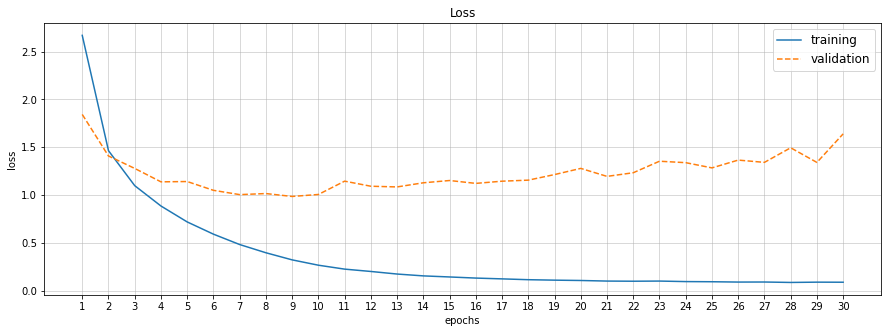

In [39]:
plt.figure(figsize=(15,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['loss'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_loss'],'--', label='validation')
plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.xticks(range(1,len(history_dict['loss'])+1))
plt.grid(alpha=0.6)
plt.show()

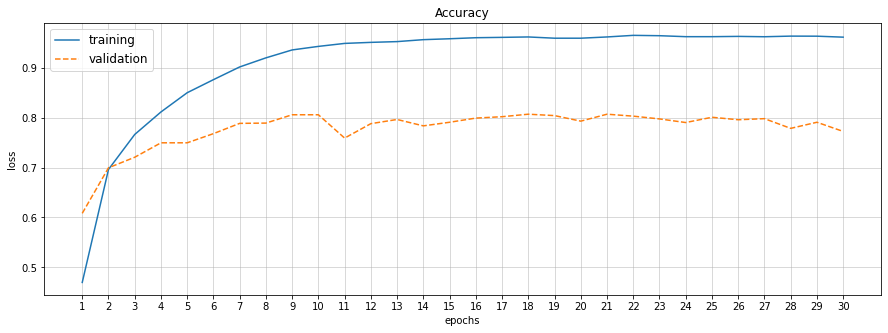

In [40]:
plt.figure(figsize=(15,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['accuracy'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_accuracy'],'--', label='validation')
plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Accuracy')
plt.xticks(range(1,len(history_dict['loss'])+1))
plt.grid(alpha=0.6)
plt.show()

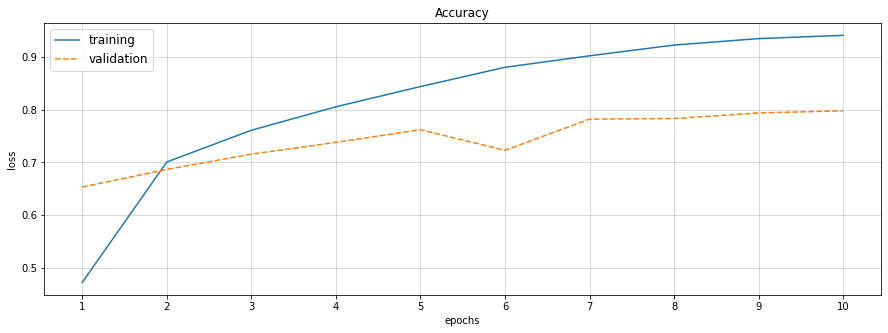

In [51]:
plt.figure(figsize=(15,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['accuracy'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_accuracy'],'--', label='validation')
plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Accuracy')
plt.xticks(range(1,len(history_dict['loss'])+1))
plt.grid(alpha=0.6)
plt.show()

Con 30 epochs:

In [45]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.6590 - accuracy: 0.7498


[1.6590245962142944, 0.7497773766517639]

Con 10 epochs:

In [52]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0127 - accuracy: 0.7845


[1.0127267837524414, 0.7845057845115662]

# Mejorar el overfiting

## Regularization

In [191]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape= (10000,), kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout((0.5))) 
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout((0.5))) 
model.add(layers.Dense(46, activation='softmax'))

In [192]:
model.compile(
    optimizer= 'rmsprop',
    loss= 'categorical_crossentropy',
    metrics= 'accuracy'
)

In [193]:
output = model.fit(
    X_train, y_train,
    epochs = 30,
    batch_size = 512,
    validation_data = (X_validation,y_validation)
)

Epoch 1/30
15/15 [==============================] - 2s 63ms/step - loss: 3.7140 - accuracy: 0.3137 - val_loss: 2.5740 - val_accuracy: 0.5754
Epoch 2/30
15/15 [==============================] - 0s 32ms/step - loss: 2.4892 - accuracy: 0.5319 - val_loss: 1.9595 - val_accuracy: 0.6361
Epoch 3/30
15/15 [==============================] - 0s 32ms/step - loss: 2.0949 - accuracy: 0.5854 - val_loss: 1.7927 - val_accuracy: 0.6700
Epoch 4/30
15/15 [==============================] - 0s 33ms/step - loss: 1.8909 - accuracy: 0.6338 - val_loss: 1.6728 - val_accuracy: 0.6995
Epoch 5/30
15/15 [==============================] - 0s 30ms/step - loss: 1.7618 - accuracy: 0.6547 - val_loss: 1.5979 - val_accuracy: 0.6989
Epoch 6/30
15/15 [==============================] - 0s 30ms/step - loss: 1.6757 - accuracy: 0.6759 - val_loss: 1.5536 - val_accuracy: 0.7051
Epoch 7/30
15/15 [==============================] - 0s 31ms/step - loss: 1.6092 - accuracy: 0.6856 - val_loss: 1.5033 - val_accuracy: 0.7151
Epoch 8/30
15

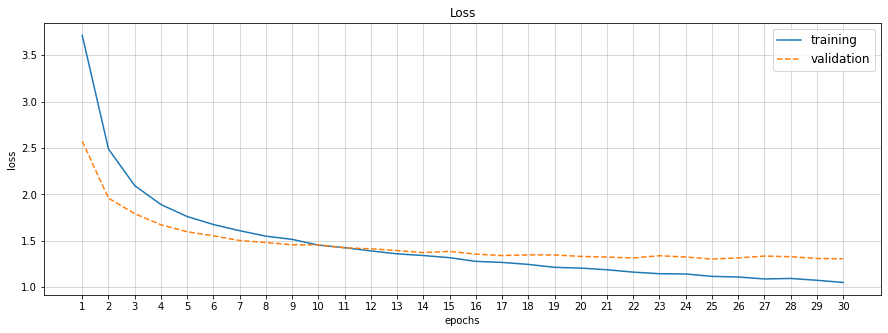

In [194]:
history_dict = output.history

plt.figure(figsize=(15,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['loss'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_loss'],'--', label='validation')
plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.xticks(range(1,len(history_dict['loss'])+1))
plt.grid(alpha=0.6)
plt.show()

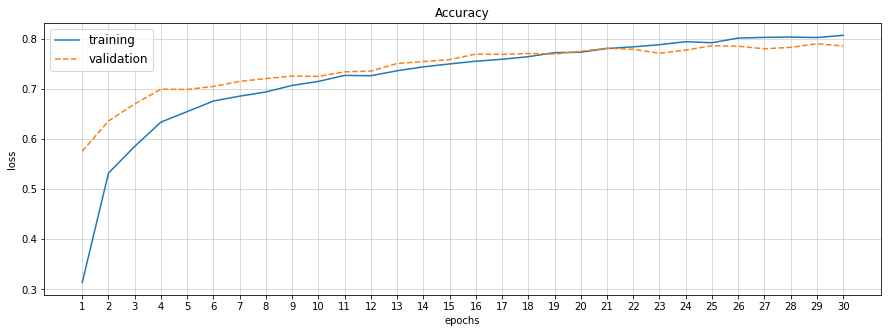

In [195]:
plt.figure(figsize=(15,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['accuracy'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_accuracy'],'--', label='validation')
plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Accuracy')
plt.xticks(range(1,len(history_dict['loss'])+1))
plt.grid(alpha=0.6)
plt.show()

In [196]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.3125 - accuracy: 0.7671


[1.312480092048645, 0.767141580581665]